In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder,OneHotEncoder

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier


from sklearn.model_selection import train_test_split, learning_curve
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
import xgboost as xgb



from sklearn import  preprocessing
from geopy.distance import geodesic 


/home/ali/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
Sample_Submission = pd.read_csv('Sample_Submission.csv')

In [3]:
data_test['Time_taken(min)'] = Sample_Submission['Time_taken (min)']
data_test


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,25.668333
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian,27.881667
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,27.023333
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian,28.153333
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian,21.018333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35:00,21:45:00,conditions Sunny,Jam,1,Snack,scooter,1,No,Metropolitian,21.972500
11395,0x443b,JAPRES11DEL01,33,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40:00,11:45:00,conditions Sandstorms,High,1,Drinks,scooter,1,No,Metropolitian,29.390000
11396,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,11-03-2022,NaN,21:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,26.244167
11397,0x22d4,VADRES03DEL02,27,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35:00,18:40:00,conditions Sandstorms,Medium,0,Meal,motorcycle,0,No,Metropolitian,23.752500


In [4]:
data = data_train.append(data_test, ignore_index=True)

/tmp/ipykernel_166361/2481661311.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_train.append(data_test, ignore_index=True)


In [5]:
data.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

<AxesSubplot:>

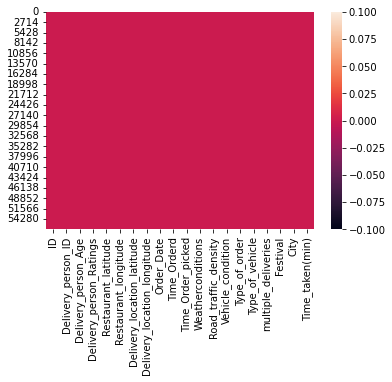

In [6]:
sns.heatmap(data.isna())

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56992 entries, 0 to 56991
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           56992 non-null  object 
 1   Delivery_person_ID           56992 non-null  object 
 2   Delivery_person_Age          56992 non-null  object 
 3   Delivery_person_Ratings      56992 non-null  object 
 4   Restaurant_latitude          56992 non-null  float64
 5   Restaurant_longitude         56992 non-null  float64
 6   Delivery_location_latitude   56992 non-null  float64
 7   Delivery_location_longitude  56992 non-null  float64
 8   Order_Date                   56992 non-null  object 
 9   Time_Orderd                  56992 non-null  object 
 10  Time_Order_picked            56992 non-null  object 
 11  Weatherconditions            56992 non-null  object 
 12  Road_traffic_density         56992 non-null  object 
 13  Vehicle_conditio

In [8]:
data.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000
mean,17.034171,70.264920,17.486049,70.897002,1.024968
std,8.186784,22.861487,7.325665,21.034559,0.839171
min,-30.905562,-88.400467,0.010000,0.010000,0.000000
25%,12.933284,73.170283,12.989166,73.293329,0.000000
50%,18.551440,75.897429,18.636258,76.002471,1.000000
75%,22.728163,78.045359,22.785536,78.107053,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


## normaling data

In [9]:
new_c= []
for c in data['Time_taken(min)']:
    try:
        c= c.split()
        new_c.append(int(c[1]))
    except:
        new_c.append(round(c))

data['Time_taken(min)']= pd.DataFrame(new_c)


In [10]:
new_c= []
for c in data['Weatherconditions']:
    try:
        c= c.split()
        new_c.append(c[1])
    except:
        pass

data['Weatherconditions']= pd.DataFrame(new_c)

In [11]:
imputer = KNNImputer(n_neighbors=9)
new_data = data.iloc[:,2:8]
new_data= imputer.fit_transform(new_data)
data.iloc[:,2:8] = new_data

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56992 entries, 0 to 56991
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           56992 non-null  object 
 1   Delivery_person_ID           56992 non-null  object 
 2   Delivery_person_Age          56992 non-null  float64
 3   Delivery_person_Ratings      56992 non-null  float64
 4   Restaurant_latitude          56992 non-null  float64
 5   Restaurant_longitude         56992 non-null  float64
 6   Delivery_location_latitude   56992 non-null  float64
 7   Delivery_location_longitude  56992 non-null  float64
 8   Order_Date                   56992 non-null  object 
 9   Time_Orderd                  56992 non-null  object 
 10  Time_Order_picked            56992 non-null  object 
 11  Weatherconditions            56992 non-null  object 
 12  Road_traffic_density         56992 non-null  object 
 13  Vehicle_conditio

In [13]:
data=data.replace('NaN', float(np.nan), regex=True)
data= data.dropna()

<AxesSubplot:xlabel='Time_taken(min)'>

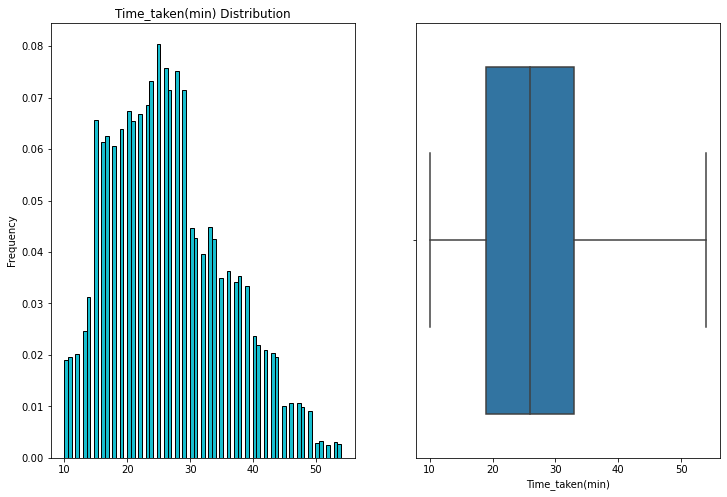

In [14]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))
data['Time_taken(min)'].plot(kind='hist',edgecolor = 'black',color='tab:cyan',
                    density = 1,ax= ax1,title='Time_taken(min) Distribution',bins=75, figsize=(12,8))
sns.boxplot(data=data,ax= ax2, x="Time_taken(min)")


Text(0.5, 1.0, 'Age Distribution')

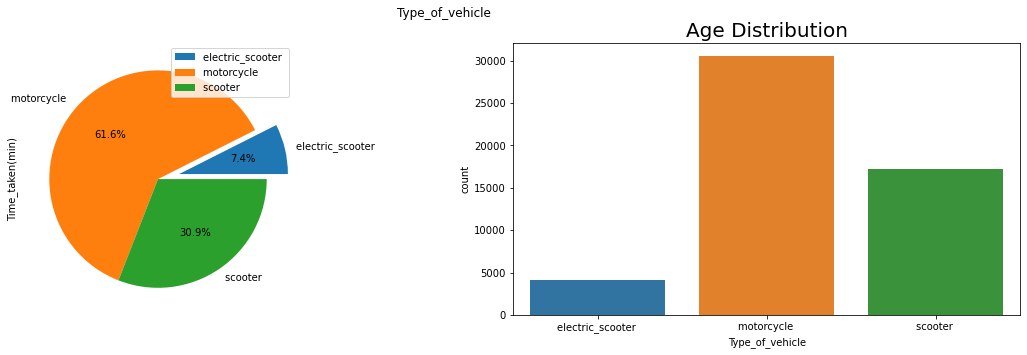

In [15]:
explode = [0.2,0,0]
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))
fig1=data[['Type_of_vehicle','Time_taken(min)']].groupby('Type_of_vehicle').sum()
fig1.plot(kind='pie',ax= ax1,autopct='%1.1f%%',explode=explode,subplots=True,figsize=(15,9),title='Type_of_vehicle')
plot = sns.countplot(x ='Type_of_vehicle',ax= ax2, data = data.sort_values(by='Type_of_vehicle'))
plot.axes.set_title("Age Distribution",fontsize=20)

Text(0.5, 1.0, 'Road Traffic density')

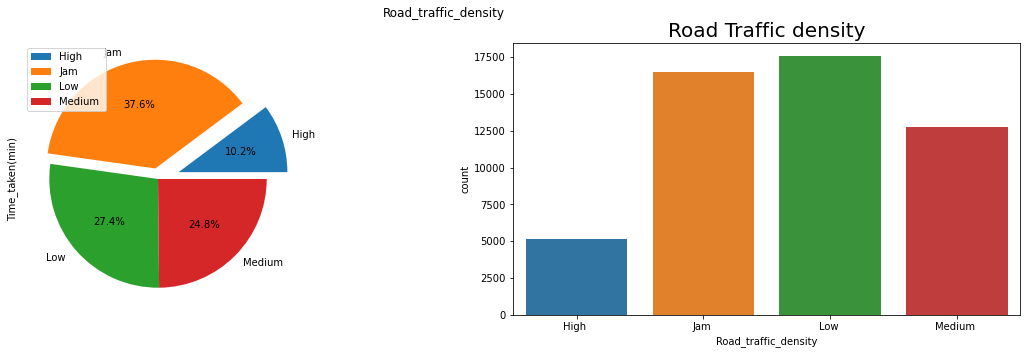

In [16]:
explode = [0.2,0.1,0,0]
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))

fig1=data[['Road_traffic_density','Time_taken(min)']].groupby('Road_traffic_density').sum()
fig1.plot(kind='pie',autopct='%1.1f%%',explode=explode, subplots=True,ax= ax1,figsize=(15,9),title='Road_traffic_density')

plot = sns.countplot(x ='Road_traffic_density',ax= ax2, data = data.sort_values(by='Road_traffic_density'))
plot.axes.set_title("Road Traffic density",fontsize=20)

Text(0.5, 1.0, 'Weatherconditions')

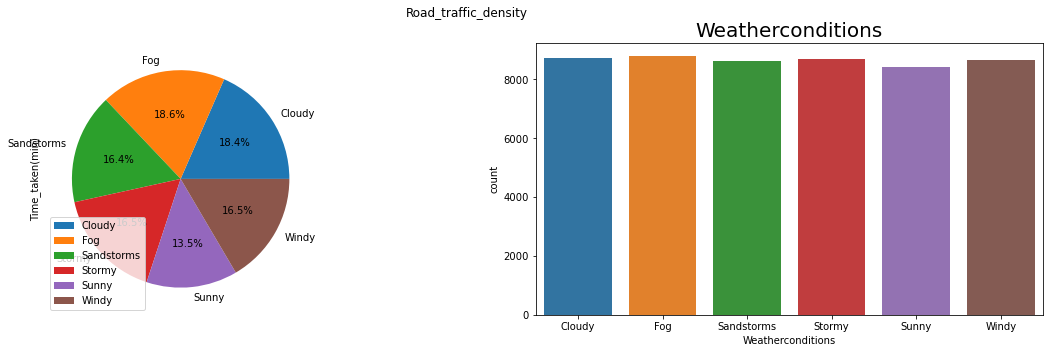

In [17]:
explode = [0.2,0.1,0,0]
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))
fig=data[['Weatherconditions','Time_taken(min)']].groupby('Weatherconditions').sum()
fig.plot(kind='pie',autopct='%1.1f%%',ax= ax1,subplots=True,figsize=(20,14),title='Road_traffic_density')

plot = sns.countplot(x ='Weatherconditions',ax= ax2, data = data.sort_values(by='Weatherconditions'))
plot.axes.set_title("Weatherconditions",fontsize=20)

Text(0.5, 1.0, 'City')

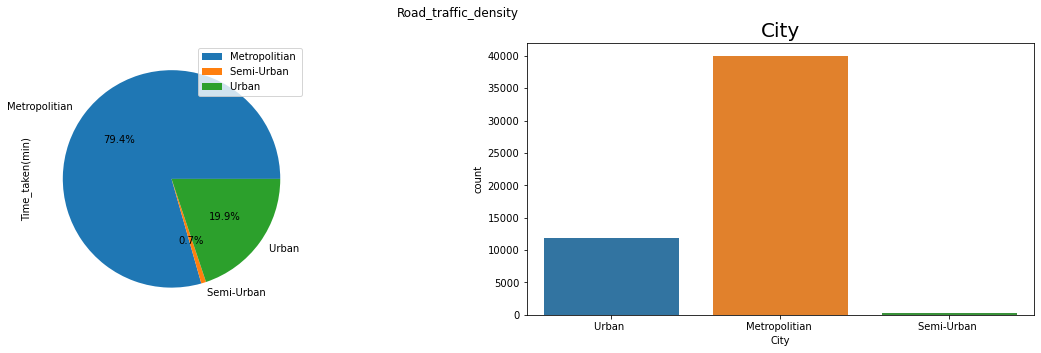

In [18]:


fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))
fig=data[['City','Time_taken(min)']].groupby('City').sum()
fig.plot(kind='pie',autopct='%1.1f%%',ax= ax1,subplots=True,figsize=(20,14),title='Road_traffic_density')

plot = sns.countplot(x ='City',ax= ax2, data = data)
plot.axes.set_title("City",fontsize=20)


Text(0.5, 1.0, 'Delivery Person Ratings')

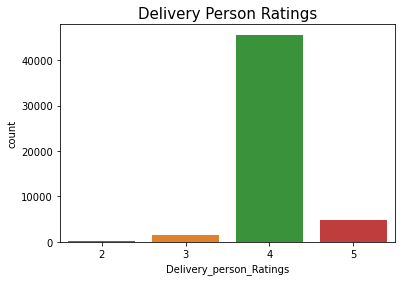

In [19]:

data['Delivery_person_Ratings']=data['Delivery_person_Ratings'].astype('int64')
plot = sns.countplot(x ='Delivery_person_Ratings',data = data)
plot.axes.set_title("Delivery Person Ratings", fontsize=15)

Text(0.5, 1.0, 'Delivery Person Ratings')

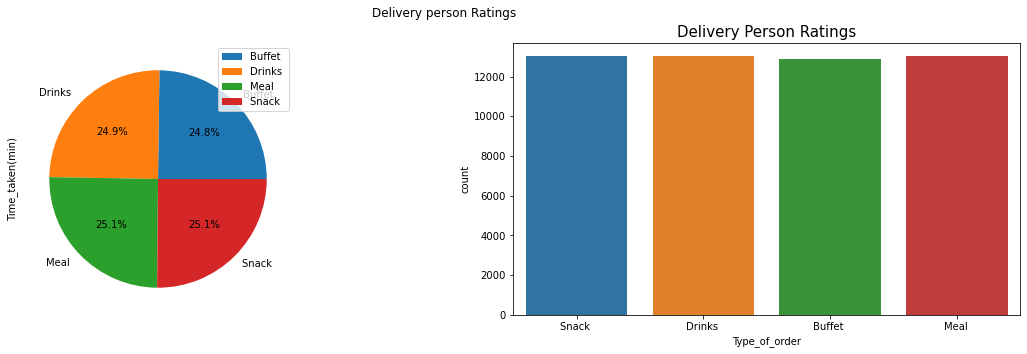

In [20]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))

fig1=data[['Type_of_order','Time_taken(min)']].groupby('Type_of_order').sum()
fig1.plot(kind='pie',autopct='%1.1f%%',subplots=True,ax= ax1,figsize=(15,9),title='Delivery person Ratings')

plot = sns.countplot(x ='Type_of_order',ax=ax2,data = data)
plot.axes.set_title("Delivery Person Ratings", fontsize=15)

<AxesSubplot:xlabel='Delivery_person_Age', ylabel='count'>

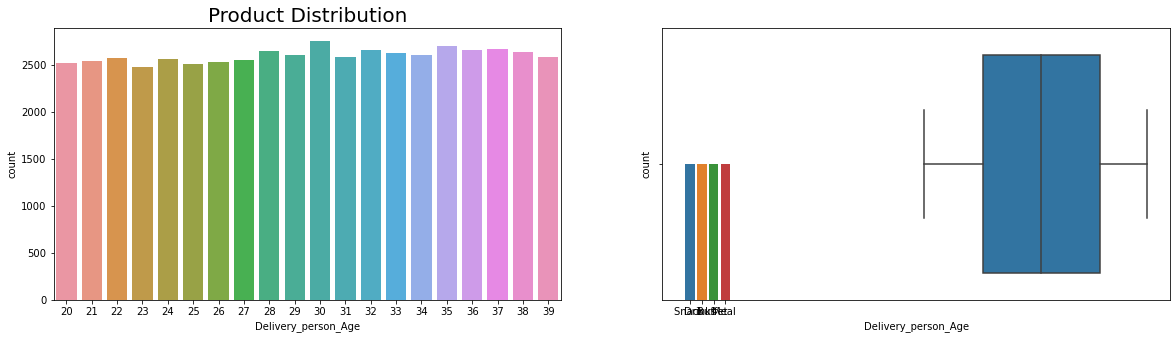

In [21]:
data['Delivery_person_Age']=data['Delivery_person_Age'].astype('int64')


fig, (ax1,ax2)= plt.subplots(1,2,figsize=(20,5))
plot = sns.countplot(x ='Delivery_person_Age',ax=ax1, data = data)
plot.axes.set_title("Product Distribution",fontsize=20)

plot = sns.countplot(x ='Type_of_order',ax=ax2,data = data)
sns.boxplot(data=data,ax=ax2, x="Delivery_person_Age")

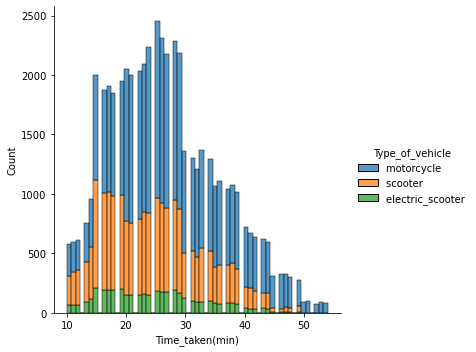

In [22]:
sns.displot(data, x="Time_taken(min)", hue="Type_of_vehicle", multiple="stack",)

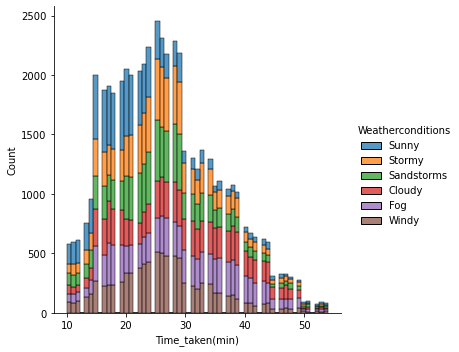

In [23]:
sns.displot(data, x="Time_taken(min)", hue="Weatherconditions", multiple="stack",)

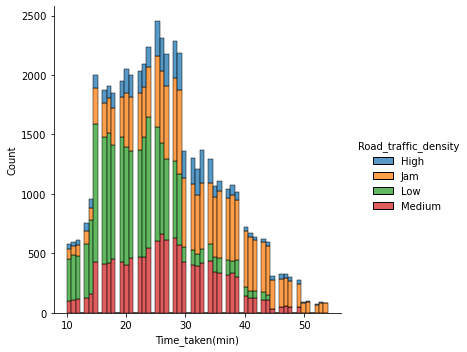

In [24]:
sns.displot(data, x="Time_taken(min)", hue="Road_traffic_density", multiple="stack",)

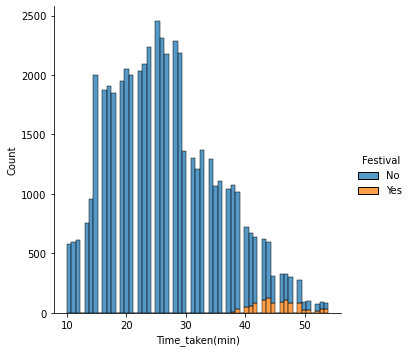

In [25]:
sns.displot(data, x="Time_taken(min)", hue="Festival", multiple="stack",)

In [26]:
num_cols = ['Delivery_person_Age','Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude',
            'Delivery_location_latitude','Delivery_location_longitude','Vehicle_condition',
            'multiple_deliveries','Time_taken(min)']
for col in num_cols:
    data[col]=data[col].astype('float64')


In [27]:
data['Order_Date']=pd.to_datetime(data['Order_Date'],format="%d-%m-%Y")

In [28]:
data['Time_Orderd']=pd.to_timedelta(data['Time_Orderd'])
data['Time_Order_picked']=pd.to_timedelta(data['Time_Order_picked'])

data['Time_Order_picked_formatted']=np.where(data['Time_Order_picked'] < data['Time_Orderd'], data['Order_Date'] + pd.DateOffset(1)+data['Time_Order_picked'], data['Order_Date']+data['Time_Order_picked'])
data['Time_Ordered_formatted'] = data['Order_Date']+ data['Time_Orderd']
data['order_prepare_time_diff_mins']=((data['Time_Order_picked_formatted']- data['Time_Ordered_formatted']).dt.total_seconds())/60

In [29]:
cols=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']
for col in cols:
    data[col]= abs(data[col])

In [30]:
data["day"] = data.Order_Date.dt.day
data["week"] = data.Order_Date.dt.isocalendar().week
data["month"] = data.Order_Date.dt.month
data["quarter"] = data.Order_Date.dt.quarter
data.drop("Order_Date",axis=1,inplace=True)

In [31]:
cols=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']
for col in cols:
    data[col]= abs(data[col])

In [32]:
data=data.drop(columns=['Time_Orderd','Time_Order_picked'],axis=1)
data=data.drop(columns=['Time_Order_picked_formatted','Time_Ordered_formatted'])

In [33]:

for col in data.columns:
    if data[col].dtype == 'uint8':
        data[col]=data[col].astype("int64")

In [34]:
data['city_code']=data['Delivery_person_ID'].str.split("RES", expand=True)[0]

In [35]:
data=data.drop(columns=["Delivery_person_ID" ],  axis=1)
data=data.drop(columns=["ID" ],  axis=1)

In [36]:
data['Weatherconditions']=pd.factorize(data.Weatherconditions)[0]
data['Road_traffic_density']=pd.factorize(data.Road_traffic_density)[0]
data['Vehicle_condition']=pd.factorize(data.Vehicle_condition)[0]
data['Type_of_order']=pd.factorize(data.Type_of_order)[0]
data['Type_of_vehicle']=pd.factorize(data.Type_of_vehicle)[0]
data['multiple_deliveries']=pd.factorize(data.multiple_deliveries)[0]
data['Festival']=pd.factorize(data.Festival)[0]
data['City']=pd.factorize(data.City)[0]
data['city_code']=pd.factorize(data.city_code)[0]

<AxesSubplot:>

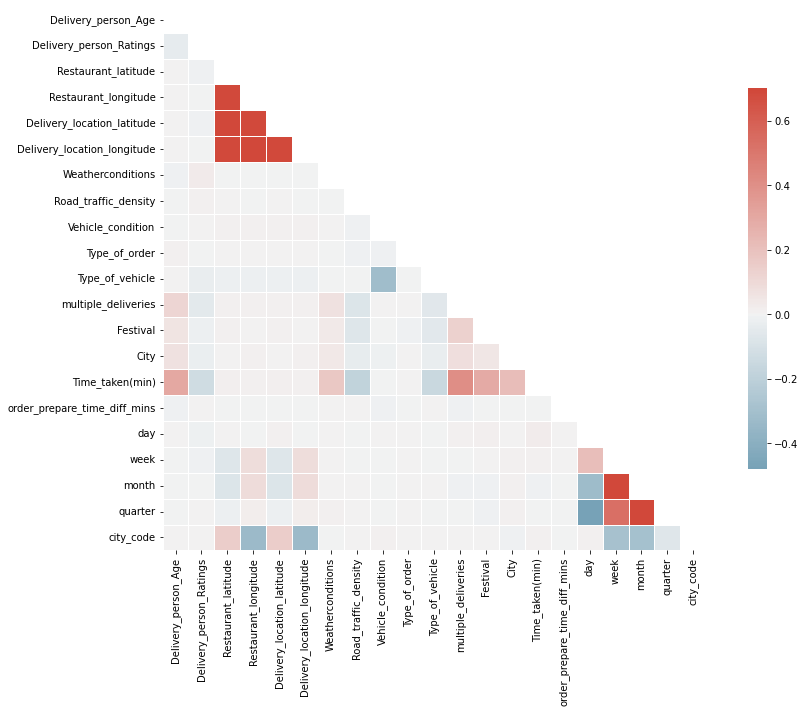

In [37]:
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15,10))
cmap = sns.diverging_palette(230, 15, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

In [38]:
X= data.drop('Time_taken(min)',axis=1)
y =  data['Time_taken(min)']

In [39]:
oh=OneHotEncoder(drop='first',handle_unknown='ignore')
s1=StandardScaler()
m1=MinMaxScaler()

ct=ColumnTransformer(
                    [
                        # ('cat_encoder',oh,make_column_selector(dtype_include='object')),
                        # ('StandardScaler',s1,make_column_selector(dtype_include='object')),
                        ('Numerical Scaler',m1,make_column_selector(dtype_exclude='object')),  
                    ]
                    ,remainder='passthrough')
X=ct.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
lr = LinearRegression(n_jobs=-1)
svr = SVR(max_iter=2000)
dtr = DecisionTreeRegressor()
knnr = KNeighborsRegressor(n_neighbors=11,n_jobs=-1)
rfr = RandomForestRegressor(n_jobs=-1,n_estimators= 100,)
abr = AdaBoostRegressor(n_estimators=100,learning_rate=0.6)
sr =SGDRegressor()
cbr = CatBoostRegressor(iterations=2000, learning_rate=1,depth=12,eval_metric='MAE', verbose=200)
xg_reg  =xgb.XGBRFRegressor(colsample_bynode=1,max_depth=19,min_child_weight= 11,alpha= 6.9353429991712695e-08,
    subsample= 1,colsample_bytree= 0.99,gamma= 1,
                            n_estimators=800,n_jobs=-1,random_state=23,grow_policy= 'depthwise')

reg_list=[lr,svr,dtr,knnr,rfr,abr,xg_reg]

In [42]:
%%time

counter=1
for reg in reg_list:
    reg.fit(X_train,y_train.values.ravel())
    print(f"Fitting {counter} done")
    counter+=1
#

Fitting 1 done


/home/ali/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Fitting 2 done
Fitting 3 done
Fitting 4 done
Fitting 5 done
Fitting 6 done
Fitting 7 done
CPU times: user 27min 19s, sys: 36.7 s, total: 27min 56s
Wall time: 4min 24s


In [43]:
%%time
score_dict={}

for reg in reg_list:
    
    reg_name = reg.__class__.__name__
    
    pred=reg.predict(X_test)
    
    print("-"*50)
    
    print(reg_name)
    mse = mean_squared_error(pred, y_test)
    rmse = np.sqrt(mse)
    print(f"R2 Score : {r2_score(y_test,pred)}")
    print(f"Mean Absolute Error Score : {mean_absolute_error(y_test,pred)}")
    print(f"Mean Squared Error Score : {mean_squared_error(y_test,pred)}")
    
    print(f"RMSE : {rmse}")
    
    
    score_dict[reg_name]={
        "R2 Score":r2_score(y_test,pred),
        "Mean Absolute Error Score":mean_absolute_error(y_test,pred),
        "Mean Squared Error Score":mean_squared_error(y_test,pred),
        "RMSE" : rmse,

    }

--------------------------------------------------
LinearRegression
R2 Score : 0.4520361329884748
Mean Absolute Error Score : 5.427040552017948
Mean Squared Error Score : 45.85887769971553
RMSE : 6.771918317560802
--------------------------------------------------
SVR
R2 Score : 0.21499747173712136
Mean Absolute Error Score : 6.333089333354575
Mean Squared Error Score : 65.69654881426273
RMSE : 8.105340758676512
--------------------------------------------------
DecisionTreeRegressor
R2 Score : 0.5345475780639775
Mean Absolute Error Score : 4.667461721935831
Mean Squared Error Score : 38.95352773717011
RMSE : 6.241276130501687
--------------------------------------------------
KNeighborsRegressor
R2 Score : 0.4792226643727189
Mean Absolute Error Score : 5.237369462883043
Mean Squared Error Score : 43.58364772035759
RMSE : 6.60179125089226
--------------------------------------------------
RandomForestRegressor
R2 Score : 0.7516723217036863
Mean Absolute Error Score : 3.4928406298889487

In [44]:

score_pd=pd.DataFrame(score_dict).transpose().sort_values("R2 Score",ascending=False)
score_pd

,R2 Score,Mean Absolute Error Score,Mean Squared Error Score,RMSE
RandomForestRegressor,0.751672,3.492841,20.782444,4.558777
XGBRFRegressor,0.720417,3.708351,23.398219,4.837171
DecisionTreeRegressor,0.534548,4.667462,38.953528,6.241276
AdaBoostRegressor,0.514424,5.186181,40.637699,6.374770
KNeighborsRegressor,0.479223,5.237369,43.583648,6.601791
LinearRegression,0.452036,5.427041,45.858878,6.771918
SVR,0.214997,6.333089,65.696549,8.105341
